In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (concatenate, Input, Dense, Dropout, BatchNormalization, 
                                     LSTM, Flatten, Conv1D, MaxPool1D, UpSampling2D)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import IPython.display as ipd
from IPython.display import Audio

from google.colab import files

%matplotlib inline

In [2]:
path = '/datasets/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
music_genres = os.listdir(path + '/Dataset/')

In [4]:
music_genres

['Alan Holdswordth',
 'Azia',
 'Bandari',
 'Chris Rea',
 'Creedence',
 'Deep Purple',
 'Foreigner',
 'Gary Moore',
 'Magnum',
 'Mick Clarcke']

In [5]:
print(os.listdir(path + '/Dataset/Magnum/'))

['01  The Prize.wav', '01  Soldier Of The Line.wav', '01  Lonely Night.wav', '01  In The Beginning.wav', '01  If I Could Live Forever.wav', '01  Great Adventure.wav', '02  The Battle.wav', '02  On The Edge Of The World.wav', '02  Need A Lot Of Love.wav', '02  Changes.wav', '02  Breakdown.wav', '02  Baby Rock Me.wav', '04  If I Could Live Forever.wav', '03  Universe.wav', '03  The Spirit.wav', '03  The Great Disaster.wav', '03  The Battle.wav', '03  Sometime Love.wav', '03  Foolish Heart.wav', '05  All That Is Real.wav', '04  Vicious Companions.wav', '04  Sacred Hour.wav', "04  Midnight (You Won't Be Sleeping).wav", '04  Kingdom Of Madness.wav', '04  In the Beginning.wav', '05  Walking The Straight Line.wav', '05  So Far Away.wav', '05  Red On The Highway.wav', '05  Reborn.wav', '05  Reborn (2).wav', '07  Foolish Heart.wav', '06  We All Play The Game.wav', '06  The Bringer.wav', '06  So Cold The Night.wav', '06  Hit And Run.wav', '06  Changes.wav', "08  Stayin' Alive.wav", '08  Lords of

In [6]:
# Параметризуем music
def get_features(y, sr):
    music_chroma = librosa.feature.chroma_stft(y=y, sr=sr)         # 12 полутонов
    music_mfcc = librosa.feature.mfcc(y=y, sr=sr)                  # 20 спектральных коэффициентов
    
    music_rms = np.mean(librosa.feature.rms(y=y) )                          # среднеквадратичная амплитуда)
    music_specCent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)) # спектральный центроид)
    music_specBw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))  # ширина полосы частот)
    music_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))   # спектральный распад частот)
    music_zcr = np.mean(librosa.feature.zero_crossing_rate(y))              # частота пересечения нуля)
    
    # список всех параметров
    out_all = []
    out_all.append(music_specCent)
    out_all.append(music_rms)
    out_all.append(music_specBw)
    out_all.append(music_rolloff)
    out_all.append(music_zcr)
    for c in music_chroma:
        out_all.append(np.mean(c))
    for f in music_mfcc:
        out_all.append(np.mean(f))

    # возвращаем полученный список
    return out_all

In [7]:
# Создаем обучающую выборку
X_train = [] 
y_train = []

for i in range(len(music_genres)):
    g = music_genres[i]
    for filename in os.listdir(f'/content/drive/MyDrive/UAI/Data_CSV/Dataset/{g}'):
        songname = f'/content/drive/MyDrive/UAI/Data_CSV/Dataset/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=90) # y-массив, sr-частота дисредитации, duration-продолжительность сек.
        # сигнал в параметризованные данные
        out_all = get_features(y, sr)
        # добавляем в X_train
        X_train.append(out_all)
        # добавляем в Y_train в формате OHE
        y_train.append(to_categorical(i, len(music_genres)))

    print(f'Группа: {g}')


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Жанр: Alan Holdswordth


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Жанр: Azia


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Жанр: Bandari


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Жанр: Chris Rea


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Жанр: Creedence


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Жанр: Deep Purple


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Жанр: Foreigner


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Жанр: Gary Moore


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Жанр: Magnum


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

Жанр: Mick Clarcke


In [8]:
len(out_all)

37

In [9]:
# Обучающую выборку в numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

In [10]:
# Backup обучающей выборки
X_train_backup = X_train.copy()
y_train_backup = y_train.copy()

In [11]:
# Контроль номеров классов
y_train_class = np.argmax(y_train, axis=1)
y_train_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [12]:
# Размеры обучающей выборки
print(f'{X_train.shape} \n{y_train.shape} \n{y_train_class.shape}')

(509, 37) 
(509, 10) 
(509,)


In [13]:
# Нормализуем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.17454629, -0.85948673,  0.28894588, ...,  0.99470435,
         0.33015559, -0.0215839 ],
       [ 0.08119529, -0.05364974,  0.42840538, ...,  0.13401003,
        -0.06554709, -0.12330309],
       [-0.30577059, -0.90793765,  0.48874846, ...,  0.29917945,
        -0.66481662,  0.16921117],
       ...,
       [-0.66383911,  0.4656162 , -0.95333743, ..., -1.35606704,
         3.056248  , -0.5185588 ],
       [ 0.09671855,  0.38288055,  0.2136097 , ...,  0.24103423,
         0.16833934,  0.14259186],
       [ 0.92673095,  0.70130735,  0.25316373, ...,  0.89304411,
        -0.16819424, -0.69484553]])

In [14]:
# Разделяем выборку на train и  test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_class, test_size=0.1)

In [15]:
# Размеры выборок
print(f'{X_train.shape} \n{y_train.shape} \n{X_test.shape} \n{y_test.shape}')

(458, 37) 
(458,) 
(51, 37) 
(51,)


Создаем нейронку Var1

In [35]:
indexes = range(0, 37)

model_Dense = Sequential([
                    BatchNormalization(input_shape=(len(indexes),)),
                    Dense(512, activation='relu', input_shape=(len(indexes),)),
                    Dense(512, activation='relu'),
                    Dropout(0.5),
                    Dense(256, activation='relu'),
                    Dense(256, activation='relu'),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(64, activation='relu'),
                    Dense(64, activation='relu'),
                    Dropout(0.2),
                    Dense(32, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(16, activation='relu'),
                    BatchNormalization(),
                    Flatten(),
                    Dense(10, activation='softmax')
                    ])

In [36]:
model_Dense.compile(optimizer=RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])   # Adam

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [37]:
model_Dense.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc (None, 37)                148       
_________________________________________________________________
dense_57 (Dense)             (None, 512)               19456     
_________________________________________________________________
dense_58 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_60 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)              

In [38]:
histoty_Dense = model_Dense.fit(X_train[:, indexes], y_train, epochs=1000, batch_size=10, validation_data=(X_test[:, indexes], y_test))

Epoch 1/1000
46/46 [==============================] - 33s 700ms/step - loss: 2.3415 - accuracy: 0.0764 - val_loss: 2.3030 - val_accuracy: 0.1176
Epoch 2/1000
46/46 [==============================] - 0s 10ms/step - loss: 2.3198 - accuracy: 0.0939 - val_loss: 2.3017 - val_accuracy: 0.2353
Epoch 3/1000
46/46 [==============================] - 0s 10ms/step - loss: 2.3164 - accuracy: 0.0895 - val_loss: 2.3008 - val_accuracy: 0.1569
Epoch 4/1000
46/46 [==============================] - 0s 11ms/step - loss: 2.3028 - accuracy: 0.1048 - val_loss: 2.2998 - val_accuracy: 0.1961
Epoch 5/1000
46/46 [==============================] - 1s 11ms/step - loss: 2.2989 - accuracy: 0.1135 - val_loss: 2.2977 - val_accuracy: 0.2157
Epoch 6/1000
46/46 [==============================] - 0s 10ms/step - loss: 2.3006 - accuracy: 0.0808 - val_loss: 2.2975 - val_accuracy: 0.1373
Epoch 7/1000
46/46 [==============================] - 0s 10ms/step - loss: 2.3019 - accuracy: 0.1092 - val_loss: 2.2972 - val_accuracy: 0.15

In [39]:
model_Dense.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 7ms/step - loss: 1.5921 - accuracy: 0.7647


[1.5921436548233032, 0.7647058963775635]

In [40]:
# максимальная точность  и ошибка на обучающей и проверочной выборе
print(f'Максимальная Точность на обучающей выборке: {max(histoty_Dense.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(histoty_Dense.history["loss"])} \
\nМаксимальная Точность на проверочной выборке: {max(histoty_Dense.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(histoty_Dense.history["val_loss"])}')

Максимальная Точность на обучающей выборке: 0.9912663698196411 
Минимальная ошибка на обучающей выборе: 0.04715268313884735 
Максимальная Точность на проверочной выборке: 0.8235294222831726 
Минимальная ошибка на проверочной выборе: 0.963208794593811


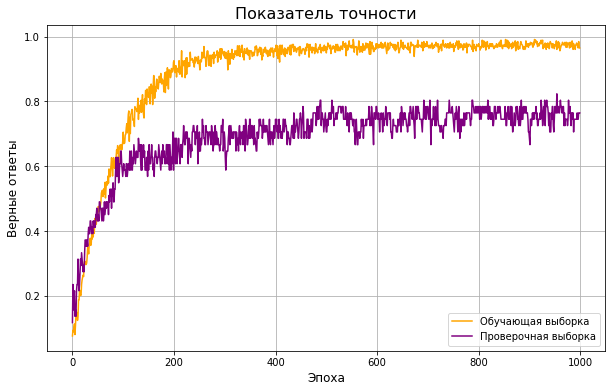

In [41]:
# # график показатель точности для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(histoty_Dense.history['accuracy'], color='orange', label='Обучающая выборка')
plt.plot(histoty_Dense.history['val_accuracy'], color='purple', label='Проверочная выборка')
plt.title('Показатель точности', fontsize=16)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Верные ответы', fontsize=12)
plt.legend()
plt.grid()
plt.show()

Дообучаем Dense сеть

In [44]:
model_Dense.compile(optimizer=RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [45]:
histoty_Dense = model_Dense.fit(X_train[:, indexes], y_train, epochs=500, batch_size=10, validation_data=(X_test[:, indexes], y_test))

Epoch 1/500
15/15 [==============================] - 2s 30ms/step - loss: 0.0179 - accuracy: 0.9956 - val_loss: 1.4934 - val_accuracy: 0.7843
Epoch 2/500
15/15 [==============================] - 0s 16ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.6108 - val_accuracy: 0.7255
Epoch 3/500
15/15 [==============================] - 0s 19ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.5942 - val_accuracy: 0.7451
Epoch 4/500
15/15 [==============================] - 0s 15ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.6786 - val_accuracy: 0.7255
Epoch 5/500
15/15 [==============================] - 0s 16ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.6566 - val_accuracy: 0.6863
Epoch 6/500
15/15 [==============================] - 0s 14ms/step - loss: 0.0187 - accuracy: 0.9956 - val_loss: 1.5891 - val_accuracy: 0.7255
Epoch 7/500
15/15 [==============================] - 0s 15ms/step - loss: 0.0123 - accuracy: 0.9956 - val_loss: 1.6774 - val_accuracy: 0.7059
Epoch 

VAR 2. Добавляем количество значений.

In [46]:
# Квадрат
X_train_sqr = np.array([[t**2 for t in x] for x in X_train])
X_test_sqr = np.array([[t**2 for t in x] for x in X_test])

# Квадратный корнь из абсолютных значений 
X_train_sqrt = np.array([[abs(t)**0.5 for t in x] for x in X_train])
X_test_sqrt = np.array([[abs(t)**0.5 for t in x] for x in X_test])

# 1/t
X_train_inv = np.array([[t**(-1) for t in x] for x in X_train])
X_test_inv = np.array([[t**(-1) for t in x] for x in X_test])

# 2 в степени t
X_train_exp = np.array([[2**t for t in x] for x in X_train])
X_test_exp = np.array([[2**t for t in x] for x in X_test])

# Объединяем все массивы(Функция hstack() соединяет массивы по горизонтали)
X_train_plus = np.hstack([X_train, X_train_sqr, X_train_sqrt, X_train_inv, X_train_exp])
X_test_plus = np.hstack([X_test, X_test_sqr, X_test_sqrt, X_test_inv, X_test_exp])

print(X_train_plus.shape)
print(X_test_plus.shape)

(458, 185)
(51, 185)


In [59]:
# Var. Plus
model_plus = Sequential([
                         BatchNormalization(input_shape=(X_train_plus.shape[1],)),
                         Dense(512, activation='relu', input_shape=(len(indexes),)),
                         Dense(512, activation='relu'),
                         Dropout(0.5),
                         Dense(256, activation='relu'),
                         Dense(256, activation='relu'),
                         Dropout(0.3),
                         Dense(128, activation='relu'),
                         Dense(128, activation='relu'),
                         Dropout(0.2),
                         Dense(64, activation='relu'),
                         Dense(64, activation='relu'),
                         Dropout(0.2),
                         Dense(32, activation='relu'),
                         Dense(32, activation='relu'),
                         BatchNormalization(),
                         Flatten(),
                         Dense(10, activation='softmax')
                        ])


In [60]:
model_plus.compile(optimizer=RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [61]:
model_plus.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_18 (Batc (None, 185)               740       
_________________________________________________________________
dense_102 (Dense)            (None, 512)               95232     
_________________________________________________________________
dense_103 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_105 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_36 (Dropout)         (None, 256)              

In [62]:
history_plus = model_plus.fit(X_train_plus, y_train, epochs=1000, batch_size=10, validation_data=(X_test_plus, y_test))

Epoch 1/1000
46/46 [==============================] - 8s 17ms/step - loss: 2.5687 - accuracy: 0.1135 - val_loss: 2.2915 - val_accuracy: 0.1569
Epoch 2/1000
46/46 [==============================] - 1s 12ms/step - loss: 2.4746 - accuracy: 0.1070 - val_loss: 2.2614 - val_accuracy: 0.1569
Epoch 3/1000
46/46 [==============================] - 1s 11ms/step - loss: 2.3912 - accuracy: 0.1114 - val_loss: 2.2535 - val_accuracy: 0.2157
Epoch 4/1000
46/46 [==============================] - 0s 11ms/step - loss: 2.3994 - accuracy: 0.1332 - val_loss: 2.2492 - val_accuracy: 0.1961
Epoch 5/1000
46/46 [==============================] - 1s 12ms/step - loss: 2.3275 - accuracy: 0.1703 - val_loss: 2.2391 - val_accuracy: 0.1569
Epoch 6/1000
46/46 [==============================] - 1s 11ms/step - loss: 2.3458 - accuracy: 0.1528 - val_loss: 2.2233 - val_accuracy: 0.1569
Epoch 7/1000
46/46 [==============================] - 1s 11ms/step - loss: 2.2938 - accuracy: 0.2052 - val_loss: 2.2119 - val_accuracy: 0.1961

In [63]:
model_plus.evaluate(X_test_plus, y_test, verbose=1)

2/2 [==============================] - 0s 8ms/step - loss: 2.8896 - accuracy: 0.6078


[2.88962721824646, 0.6078431606292725]

In [64]:
# максимальная точность  и ошибка на обучающей и проверочной выборе
print(f'Максимальная Точность на обучающей выборке: {max(history_plus.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history_plus.history["loss"])} \
\nМаксимальная Точность на проверочной выборке: {max(history_plus.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history_plus.history["val_loss"])}')

Максимальная Точность на обучающей выборке: 0.9978166222572327 
Минимальная ошибка на обучающей выборе: 0.015550178475677967 
Максимальная Точность на проверочной выборке: 0.686274528503418 
Минимальная ошибка на проверочной выборе: 1.5042203664779663


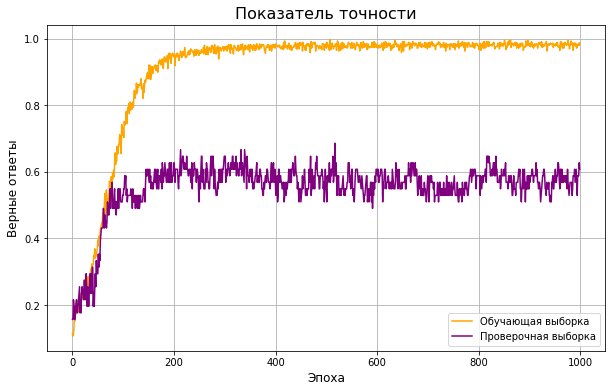

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(history_plus.history['accuracy'], color='orange', label='Обучающая выборка')
plt.plot(history_plus.history['val_accuracy'], color='purple', label='Проверочная выборка')
plt.title('Показатель точности', fontsize=16)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Верные ответы', fontsize=12)
plt.legend()
plt.grid()
plt.show()

VAR3 Сеть с несколькими входами.

In [96]:
indexes = range(0, 37)

input = Input(len(indexes),)

x1 = BatchNormalization()(input)
x1 = Dense(512, activation='relu')(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.5)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.2)(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dropout(0.2)(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dense(32, activation='relu')(x1)


x2 = BatchNormalization()(input)
x2 = Dense(512, activation='relu')(x2)
x2 = Dense(512, activation='relu')(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(32, activation='relu')(x2)
x2 = Dense(32, activation='relu')(x2)


x3 = BatchNormalization()(input)
x3 = Dense(512, activation='relu')(x3)
x3 = Dense(512, activation='relu')(x3)
x3 = Dropout(0.5)(x3)
x3 = Dense(256, activation='relu')(x3)
x3 = Dense(256, activation='relu')(x3)
x3 = Dropout(0.3)(x3)
x3 = Dense(128, activation='relu')(x3)
x3 = Dense(128, activation='relu')(x3)
x3 = Dropout(0.2)(x3)
x3 = Dense(64, activation='relu')(x3)
x3 = Dense(64, activation='relu')(x3)
x3 = Dropout(0.2)(x3)
x3 = Dense(32, activation='relu')(x3)
x3 = Dense(32, activation='relu')(x3)


x = concatenate([x1, x2, x3])
x = Dense(32, activation='relu')(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

In [97]:
model_var3 = Model(input, x)
model_var3.compile(optimizer=RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [98]:
model_var3.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 37)]         0                                            
__________________________________________________________________________________________________
batch_normalization_41 (BatchNo (None, 37)           148         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_42 (BatchNo (None, 37)           148         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_43 (BatchNo (None, 37)           148         input_9[0][0]                    
____________________________________________________________________________________________

In [99]:
history_var3 = model_var3.fit(X_train[:,indexes], y_train, epochs=500, batch_size=16, validation_data=(X_test[:, indexes], y_test))

Epoch 1/500
29/29 [==============================] - 7s 108ms/step - loss: 2.3031 - accuracy: 0.0852 - val_loss: 2.2976 - val_accuracy: 0.1373
Epoch 2/500
29/29 [==============================] - 3s 110ms/step - loss: 2.2998 - accuracy: 0.1114 - val_loss: 2.2946 - val_accuracy: 0.1765
Epoch 3/500
29/29 [==============================] - 3s 111ms/step - loss: 2.2919 - accuracy: 0.1332 - val_loss: 2.2859 - val_accuracy: 0.1569
Epoch 4/500
29/29 [==============================] - 3s 85ms/step - loss: 2.2864 - accuracy: 0.1354 - val_loss: 2.2729 - val_accuracy: 0.1569
Epoch 5/500
29/29 [==============================] - 3s 99ms/step - loss: 2.2666 - accuracy: 0.1594 - val_loss: 2.2435 - val_accuracy: 0.1765
Epoch 6/500
29/29 [==============================] - 3s 93ms/step - loss: 2.2352 - accuracy: 0.1900 - val_loss: 2.2107 - val_accuracy: 0.1765
Epoch 7/500
29/29 [==============================] - 3s 98ms/step - loss: 2.1910 - accuracy: 0.1900 - val_loss: 2.1680 - val_accuracy: 0.1961
Epo

In [100]:
model_var3.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 10ms/step - loss: 1.7171 - accuracy: 0.7059


[1.717068076133728, 0.7058823704719543]

In [101]:
# максимальная точность  и ошибка на обучающей и проверочной выборе
print(f'Максимальная Точность на обучающей выборке: {max(history_var3.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(history_var3.history["loss"])} \
\nМаксимальная Точность на проверочной выборке: {max(history_var3.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(history_var3.history["val_loss"])}')

Максимальная Точность на обучающей выборке: 1.0 
Минимальная ошибка на обучающей выборе: 0.006254076026380062 
Максимальная Точность на проверочной выборке: 0.8039215803146362 
Минимальная ошибка на проверочной выборе: 0.9320768713951111


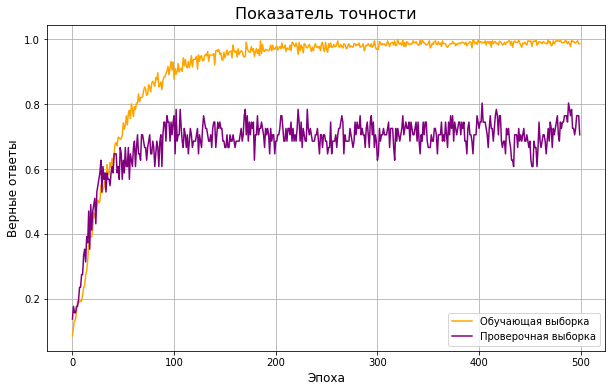

In [102]:
# # график показатель точности для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(history_var3.history['accuracy'], color='orange', label='Обучающая выборка')
plt.plot(history_var3.history['val_accuracy'], color='purple', label='Проверочная выборка')
plt.title('Показатель точности', fontsize=16)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Верные ответы', fontsize=12)
plt.legend()
plt.grid()
plt.show()

Распознавание

In [123]:
song = '/content/drive/MyDrive/UAI/Data_CSV/Dataset/Magnum/01  Great Adventure.wav'

In [124]:
y, sr = librosa.load(song, mono=True, duration=90)
song_out = get_features(y, sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [126]:
song_out = np.array(song_out).reshape(1, 37)

song_out.shape

(1, 37)

In [127]:
song_out = scaler.transform(song_out)

In [128]:
song_predict = model_Dense.predict(song_out)

In [133]:
print(song_predict)
print(np.argmax(song_predict))
print(music_genres.index('Magnum'))

[[1.5967605e-03 4.0534306e-03 1.9074723e-03 3.3217736e-03 2.3520389e-04
  5.8035227e-04 1.0855056e-03 1.5997724e-03 9.8439401e-01 1.2257297e-03]]
8
8


Нейронная сеть на распознавание рок-групп по воспроизводимому фрагменту. Датасет собственного производства 10 групп, по 50 песен, с уменьшением качества аудио в формате Wav. Фрормат аудио MP3 или wav на точность нейронной сети ни какого значения не оказывает. 
Датасет имеет мало данных для качественного обучения нейронной сети. Увеличение продолжительности отрезка, увеличивает качество нейронной сети. Всвязи с большим временем загрузки набора данных не экспериментировал со стерео звуком.
Полносвязная сеть дала неплохие результаты с максимальным качеством = 82.35 %. Дообучение не дало увеличение точности.
Увеличение количества значений не дало положительных результатов. Качество НС упало = 68.82 %.
Сеть с 3 входами показала  неплохие результаты, с максимальным 
качеством = 80.39 %.
Dense сеть распознала заданнуую для расознавания песню.


